In [42]:
import numpy as np

# mass of solar system bodies in kg
mass = {'Sun': 1.989e30, 'Venus': 4.87e24, 'Earth': 5.97e24, 
             'Mars': 0.642e24, 'Jupiter': 1898e24, 'Saturn': 568e24, 
             'Titan': 0.1345e24, 'Atlas': 5.6e3}

# distance from sun in km
distance = {'Venus': 108.2e6, 'Earth': 149.6e6, 'Mars': 227.9e6,
             'Jupiter': 778.6e6, 'Saturn': 1433.5e6, 'Titan': 1434.7e6, 'Atlas': 150.8e6}

# initial radial degree 
initial_deg = {'Venus': 14.22, 'Earth': 219.09, 'Mars': 229.93, 
                'Jupiter': 172.26, 'Saturn': 252.770000, 'Titan': 252.770000, 'Atlas': 219.09}

# orbital velocities in km/day
orbital_velocity = {'Venus': 1.9414e7, 'Earth': 3.15533e7, 'Mars': 5.93568e7, 
                   'Jupiter': 7.05542e7, 'Saturn': 1.308528e8}

def position_components(deg, distance):
    """converts polar coordinates to cartesian coordinates for position
    Input:
    ------
    deg
        angle in degrees
    distance
        distance from sun to planet (used for conversion calculation)
        
    Output:
    -------
    x, y
        x and y coordinates where sun is at origin
    """
    rad = np.deg2rad(deg)
    x = distance*np.cos(rad)
    y = distance*np.sin(rad)
    return np.array([x, y])

def velocity_components(deg, orbital_velocity):
    """converts tangential velocity to cartesian components with respect to sun
    Input:
    ------
    deg
        angle of planet in degrees
    orbital velocity
        orbital velocity of selected planet
        
    Output:
    -------
    x, y
        x and y coordinates where sun is at origin
    """
    phi = deg + 90
    rad = np.deg2rad(phi)
    vx = orbital_velocity*np.sin(rad)
    vy = orbital_velocity*np.cos(rad)
    return vx, vy

def initial_velocity(angle, distance, period):
  
    x = np.deg2rad(angle)
    return (2*np.pi*distance * np.array([np.sin(x), -np.cos(x)])) / period 
    
def F_gravity(r, m, M):
    G_grav = 5e-10
    rr = np.sum(r*r)
    r_hat = r/np.sqrt(rr)
    return -G_grav* m * M/rr * r_hat

def integrate_all_orbits(t_max=3650, launchday=200,dt = 0.1, velofrac=.5):
    """worry about description later"""
    r0 = np.zeros((7, 2))
    v0 = np.zeros_like(r0)
    
    Nsteps = int(t_max/dt)
    t = dt*np.linspace(0, t_max, Nsteps)
    
    r0[0] = position_components(initial_deg['Venus'], distance['Venus'])
    r0[1] = position_components(initial_deg['Earth'], distance['Earth'])
    r0[2] = position_components(initial_deg['Mars'], distance['Mars'])
    r0[3] = position_components(initial_deg['Jupiter'], distance['Jupiter'])
    r0[4] = position_components(initial_deg['Saturn'], distance['Saturn'])
    r0[5] = position_components(initial_deg['Titan'], distance['Titan'])
    r0[6] = position_components(initial_deg['Atlas'], distance['Atlas'])
    
    v0[0] = initial_velocity(initial_deg['Venus'], distance['Venus'], 243)
    v0[1] = initial_velocity(initial_deg['Earth'], distance['Earth'], 365)
    v0[2] = initial_velocity(initial_deg['Mars'], distance['Mars'], 686)
    v0[3] = initial_velocity(initial_deg['Jupiter'], distance['Jupiter'], 4332)
    v0[4] = initial_velocity(initial_deg['Saturn'], distance['Saturn'], 10775)
    v0[5] = initial_velocity(initial_deg['Titan'], 1.2e6, 16) + v0[4]
    v0[6] = v0[1]
    
    r = np.zeros([Nsteps, 7, 2])
    v = np.zeros_like(r)
    
    for i in range(0, 7):
        r[0, i, :] = r0[i]
        v[0, i, :] = v0[i]
    
    Ft_0 = (F_gravity(r[0, 0], mass['Venus'], mass['Sun']) + 
            F_gravity(r[0, 0]-r[0, 1], mass['Venus'], mass['Earth']) + 
            F_gravity(r[0, 0]-r[0, 2], mass['Venus'], mass['Mars']) + 
            F_gravity(r[0, 0]-r[0, 3], mass['Venus'], mass['Jupiter']) + 
            F_gravity(r[0, 0]-r[0, 4], mass['Venus'], mass['Saturn']))
    Ft_1 = (F_gravity(r[0, 1], mass['Earth'], mass['Sun']) + 
            F_gravity(r[0, 1]-r[0, 0], mass['Earth'], mass['Venus']) + 
            F_gravity(r[0, 1]-r[0, 2], mass['Earth'], mass['Mars']) + 
            F_gravity(r[0, 1]-r[0, 3], mass['Earth'], mass['Jupiter']) + 
            F_gravity(r[0, 1]-r[0, 4], mass['Earth'], mass['Saturn']))
    Ft_2 = (F_gravity(r[0, 2], mass['Mars'], mass['Sun']) + 
            F_gravity(r[0, 2]-r[0, 0], mass['Mars'], mass['Venus']) + 
            F_gravity(r[0, 2]-r[0, 1], mass['Mars'], mass['Earth']) + 
            F_gravity(r[0, 2]-r[0, 3], mass['Mars'], mass['Jupiter']) + 
            F_gravity(r[0, 2]-r[0, 4], mass['Mars'], mass['Saturn']))
    Ft_3 = (F_gravity(r[0, 3], mass['Jupiter'], mass['Sun']) + 
            F_gravity(r[0, 3]-r[0, 0], mass['Jupiter'], mass['Venus']) + 
            F_gravity(r[0, 3]-r[0, 1], mass['Jupiter'], mass['Earth']) + 
            F_gravity(r[0, 3]-r[0, 2], mass['Jupiter'], mass['Mars']) + 
            F_gravity(r[0, 3]-r[0, 4], mass['Jupiter'], mass['Saturn']))
    Ft_4 = (F_gravity(r[0, 4], mass['Saturn'], mass['Sun']) + 
            F_gravity(r[0, 4]-r[0, 0], mass['Saturn'], mass['Venus']) + 
            F_gravity(r[0, 4]-r[0, 1], mass['Saturn'], mass['Earth']) + 
            F_gravity(r[0, 4]-r[0, 2], mass['Saturn'], mass['Mars']) + 
            F_gravity(r[0, 4]-r[0, 3], mass['Saturn'], mass['Jupiter']))
    Ft_5 = (F_gravity(r[0, 5]-r[0, 4], mass['Titan'], mass['Saturn']) + 
            F_gravity(r[0, 5], mass['Titan'], mass['Sun']))
    Ft_6 = (F_gravity(r[0, 6], mass['Atlas'], mass['Sun']) + 
            F_gravity(r[0, 6]-r[0, 0], mass['Atlas'], mass['Venus']) + 
            F_gravity(r[0, 6]-r[0, 1], mass['Atlas'], mass['Earth']) + 
            F_gravity(r[0, 6]-r[0, 2], mass['Atlas'], mass['Mars']) + 
            F_gravity(r[0, 6]-r[0, 3], mass['Atlas'], mass['Jupiter']) +
            F_gravity(r[0, 6]-r[0, 4], mass['Atlas'], mass['Saturn']) + 
            F_gravity(r[0, 6]-r[0, 5], mass['Atlas'], mass['Titan']))
    
    for i in range(Nsteps-1):

        v_half_0 = v[i, 0] + 0.5*dt*Ft_0/mass['Venus']
        v_half_1 = v[i, 1] + 0.5*dt*Ft_1/mass['Earth']
        v_half_2 = v[i, 2] + 0.5*dt*Ft_2/mass['Mars']
        v_half_3 = v[i, 3] + 0.5*dt*Ft_3/mass['Jupiter']
        v_half_4 = v[i, 4] + 0.5*dt*Ft_4/mass['Saturn']
        v_half_5 = v[i, 5] + 0.5*dt*Ft_5/mass['Titan']
        v_half_6 = v[i, 6] + 0.5*dt*Ft_6/mass['Atlas']
        r[i+1, 0] = r[i, 0] + dt*v_half_0
        r[i+1, 1] = r[i, 1] + dt*v_half_1
        r[i+1, 2] = r[i, 2] + dt*v_half_2
        r[i+1, 3] = r[i, 3] + dt*v_half_3
        r[i+1, 4] = r[i, 4] + dt*v_half_4
        r[i+1, 5] = r[i, 5] + dt*v_half_5
        r[i+1, 6] = r[i, 6] + dt*v_half_6
        Ft_next_0 = (F_gravity(r[i+1, 0], mass['Venus'], mass['Sun']) + 
            F_gravity(r[i+1, 0]-r[i+1, 1], mass['Venus'], mass['Earth']) + 
            F_gravity(r[i+1, 0]-r[i+1, 2], mass['Venus'], mass['Mars']) + 
            F_gravity(r[i+1, 0]-r[i+1, 3], mass['Venus'], mass['Jupiter']) + 
            F_gravity(r[i+1, 0]-r[i+1, 4], mass['Venus'], mass['Saturn']))
        Ft_next_1 = (F_gravity(r[i+1, 1], mass['Earth'], mass['Sun']) + 
            F_gravity(r[i+1, 1]-r[i+1, 0], mass['Earth'], mass['Venus']) + 
            F_gravity(r[i+1, 1]-r[i+1, 2], mass['Earth'], mass['Mars']) + 
            F_gravity(r[i+1, 1]-r[i+1, 3], mass['Earth'], mass['Jupiter']) + 
            F_gravity(r[i+1, 1]-r[i+1, 4], mass['Earth'], mass['Saturn']))
        Ft_next_2 = (F_gravity(r[i+1, 2], mass['Mars'], mass['Sun']) + 
            F_gravity(r[i+1, 2]-r[i+1, 0], mass['Mars'], mass['Venus']) + 
            F_gravity(r[i+1, 2]-r[i+1, 1], mass['Mars'], mass['Earth']) + 
            F_gravity(r[i+1, 2]-r[i+1, 3], mass['Mars'], mass['Jupiter']) + 
            F_gravity(r[i+1, 2]-r[i+1, 4], mass['Mars'], mass['Saturn']))
        Ft_next_3 = (F_gravity(r[i+1, 3], mass['Jupiter'], mass['Sun']) + 
            F_gravity(r[i+1, 3]-r[i+1, 0], mass['Jupiter'], mass['Venus']) + 
            F_gravity(r[i+1, 3]-r[i+1, 1], mass['Jupiter'], mass['Earth']) + 
            F_gravity(r[i+1, 3]-r[i+1, 2], mass['Jupiter'], mass['Mars']) + 
            F_gravity(r[i+1, 3]-r[i+1, 4], mass['Jupiter'], mass['Saturn']))
        Ft_next_4 = (F_gravity(r[i+1, 4], mass['Saturn'], mass['Sun']) + 
            F_gravity(r[i+1, 4]-r[i+1, 0], mass['Saturn'], mass['Venus']) + 
            F_gravity(r[i+1, 4]-r[i+1, 1], mass['Saturn'], mass['Earth']) + 
            F_gravity(r[i+1, 4]-r[i+1, 2], mass['Saturn'], mass['Mars']) + 
            F_gravity(r[i+1, 4]-r[i+1, 3], mass['Saturn'], mass['Jupiter']))
        Ft_next_5 = (F_gravity(r[i+1, 5]-r[i+1, 4], mass['Titan'], mass['Saturn']) + 
            F_gravity(r[i+1, 5], mass['Titan'], mass['Sun']))
        Ft_next_6 = (F_gravity(r[i+1, 6], mass['Atlas'], mass['Sun']) + 
            F_gravity(r[i+1, 6]-r[i+1, 0], mass['Atlas'], mass['Venus']) + 
            F_gravity(r[i+1, 6]-r[i+1, 1], mass['Atlas'], mass['Earth']) + 
            F_gravity(r[i+1, 6]-r[i+1, 2], mass['Atlas'], mass['Mars']) + 
            F_gravity(r[i+1, 6]-r[i+1, 3], mass['Atlas'], mass['Jupiter']) +
            F_gravity(r[i+1, 6]-r[i+1, 4], mass['Atlas'], mass['Saturn']) + 
            F_gravity(r[i+1, 6]-r[i+1, 5], mass['Atlas'], mass['Titan']))
        
        v[i+1, 0] = v_half_0 + 0.5*dt*Ft_next_0/mass['Venus']
        v[i+1, 1] = v_half_1 + 0.5*dt*Ft_next_1/mass['Earth']
        v[i+1, 2] = v_half_2 + 0.5*dt*Ft_next_2/mass['Mars']
        v[i+1, 3] = v_half_3 + 0.5*dt*Ft_next_3/mass['Jupiter']
        v[i+1, 4] = v_half_4 + 0.5*dt*Ft_next_4/mass['Saturn']
        v[i+1, 5] = v_half_5 + 0.5*dt*Ft_next_5/mass['Titan']
        v[i+1, 6] = v_half_6 + 0.5*dt*Ft_next_6/mass['Atlas']
        
        Ft_0 = Ft_next_0
        Ft_1 = Ft_next_1
        Ft_2 = Ft_next_2
        Ft_3 = Ft_next_3
        Ft_4 = Ft_next_4
        Ft_5 = Ft_next_5
        Ft_6 = Ft_next_6
    
        if i < int(launchday/dt):
            r[i+1, 6] = r[i+1, 1]
            v[i+1, 6] = v[i+1, 1]
            Ft_6[:] = 0
            Ft_next_6[:] = 0
        if i == int(launchday/dt): 
            r[i+1, 6] = r[i+1, 1] + .01*r[i+1, 1] 
            v[i+1, 6] = v[i+1, 1] + velofrac*v[i+1, 1]
            Ft_6 = (F_gravity(r[i+1, 6], mass['Atlas'], mass['Sun']) + 
            F_gravity(r[i+1, 6]-r[i+1, 0], mass['Atlas'], mass['Venus']) + 
            F_gravity(r[i+1, 6]-r[i+1, 1], mass['Atlas'], mass['Earth']) + 
            F_gravity(r[i+1, 6]-r[i+1, 2], mass['Atlas'], mass['Mars']) + 
            F_gravity(r[i+1, 6]-r[i+1, 3], mass['Atlas'], mass['Jupiter']) +
            F_gravity(r[i+1, 6]-r[i+1, 4], mass['Atlas'], mass['Saturn']) + 
            F_gravity(r[i+1, 6]-r[i+1, 5], mass['Atlas'], mass['Titan']))
        if i == int(2530/dt): 
            #v[i+1, 6] = [-0.4*v[i+1,6][0],v[i+1, 5][1]]
            v[i+1, 6] = [0.80866*v[i+1,6][0],2.21166*v[i+1,6][1]]
        #if i == int(2535/dt):
            #v[i+1, 6] = [0.2*v[i+1,6][0],0.2*v[i+1,6][1]]
    return r, v

In [43]:
##r, v = integrate_all_orbits(t_max=2645, launchday=234, velofrac=0.339) Interaction!
from mpl_toolkits.mplot3d import Axes3D
#r, v = integrate_all_orbits(t_max=2535.7, launchday=232,dt=0.03,velofrac=0.33899)
r, v = integrate_all_orbits(t_max=2535.7, launchday=232,dt=0.03,velofrac=0.33899)

In [56]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes as zoom
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline

def plot_bodies(r, v, figname="no"):
    """plot solar system and ATLAS rocket"""
    
    fig1 = plt.figure(figsize=(12, 9))
    print("Simulating Venus, Earth, Mars, Jupiter, and Saturn orbits")

    rV = r[:, 0, :]
    rE = r[:, 1, :]
    rM = r[:, 2, :]
    rJ = r[:, 3, :]
    rS = r[:, 4, :]
    rT = r[:, 5, :]
    rA = r[:, 6, :]
    vV = v[:, 0, :]

    ax1 = fig1.add_subplot(111)
    ax1.plot(rV[:, 0], rV[:, 1], label="V", color="orange")
    ax1.plot(rE[:, 0], rE[:, 1], label="E", color="blue")
    ax1.plot(rM[:, 0], rM[:, 1], label="M", color="red")
    ax1.plot(rJ[:, 0], rJ[:, 1], label="J", color="tan")
    ax1.plot(rS[:, 0], rS[:, 1], label="S", color="brown")
    ax1.plot(rA[:, 0], rA[:, 1], label="A", color="black")
    ax1.plot(rT[:, 0], rT[:, 1], label="T", color="gray")
    ax1.plot(rV[-1, 0], rV[-1, 1],color="orange", marker='o')
    ax1.plot(rE[-1, 0], rE[-1, 1],color="blue", marker='o')
    ax1.plot(rM[-1, 0], rM[-1, 1],color="red", marker='o')
    ax1.plot(rJ[-1, 0], rJ[-1, 1],color="tan", marker='o')
    ax1.plot(rS[-1, 0], rS[-1, 1],color="brown", marker='o')
    ax1.plot(rA[-1, 0], rA[-1, 1],color="black", marker='o')
    ax1.plot(rT[-1, 0], rT[-1, 1],color="gray", marker='o')
    ax1.plot(0,0, color="yellow", marker='*')
    ax1.legend(loc='best')

    # for smaller zoomed plot, can remove if we want.  Only there for extra detail
    ax_inset = zoom(ax1, 5000, loc=4)
    ax_inset.plot(rS[:, 0], rS[:, 1], label="S", color="brown")
    ax_inset.plot(rT[:, 0], rT[:, 1], label="T", color="gray")
    ax_inset.plot(rA[:, 0], rA[:, 1], label="A", color="black")
    ax_inset.plot(rS[-1, 0], rS[-1, 1],color="brown")
    ax_inset.plot(rA[-1, 0], rA[-1, 1],color="black")
    ax_inset.plot(rT[-1, 0], rT[-1, 1],color="gray")
    x1, x2, y1, y2 = rT[-1,0]-.1e6, rT[-1,0]+0.1e6, rT[-1,1]-0.1e6, rT[-1,1]+0.1e6
    ax_inset.set_xlim(x1, x2) 
    ax_inset.set_ylim(y1, y2)
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    #mark_inset(ax1, ax_inset, loc1=1, loc2=3, fc="none", ec="0.5")
    
    if figname != "no":
        fig1.savefig(figname)

Simulating Venus, Earth, Mars, Jupiter, and Saturn orbits


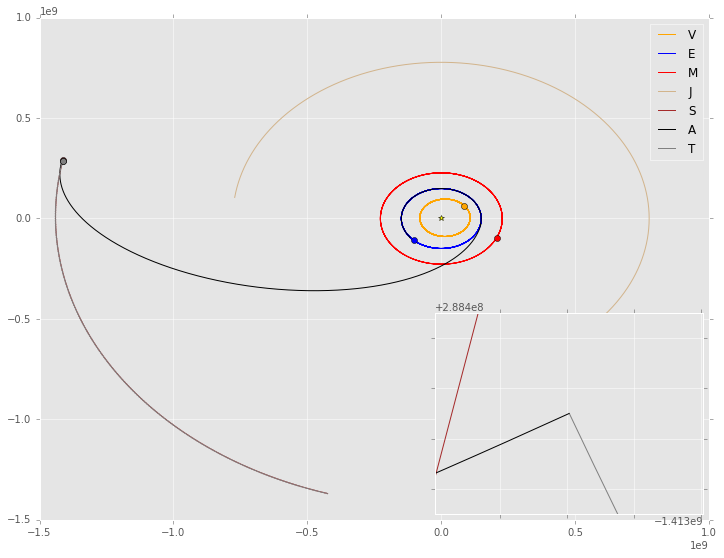

In [57]:
plot_bodies(r, v, figname="ATLAS_en_route")